# What is the Best Neighborhood in Pittsburgh?
### *Team Fam, LLC*
## Introduction:
Using data from WPRDC, we aimed to find the best nieghborhood in Pittsburgh. Since everyone's definition of "bestness" may be different, we decided to approach this from the angle of raising a family. So, what makes a neighborhood family friendly? As a parent or guardian, one would want to raise their children in an environment that promotes development and learning through a strong school system, safety and quietness through a low crime rate, and social and physical well-being through local entertainment facilities. Ultimately, this all boils down to three main ideas:
*Education, Safety, and Entertainment*.
## The Metric
In order to measure these attributes, we used the following data:
- [School Enrollment](https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-school-enrollment/resource/eb1f8714-e0eb-4614-acfe-dfe0ebab942f)
- [Non-Traffic Citations](https://data.wprdc.org/dataset/non-traffic-citations/resource/6b11e87d-1216-463d-bbd3-37460e539d86?view_id=868aea6a-f85a-4547-8402-80c639555f13)
- [Playground Equipment](https://data.wprdc.org/dataset/playground-equipment/resource/e39ef76e-0a11-47c8-a86f-a37f55db7a2b)

School enrollment data allowed us to see the percentage of the community enrolled in school (pre-college), non-traffic citations gave us information on the amount of crime in the area, and playground equipment data provided a number of different playground equipments/facilities available in each neighborhood. By implementing a simple scoring system that assigned values to each neighborhood based on their position in sorted data **(the lowest score wins)**, we were able to show promising results that helped us determine the best neighborhood in Pittsburgh to raise a family. 

## School Enrollment:
The school enrollment data from WPRDC included those enrolled in nursery school through graduate school. Since Pittsburgh houses a high volume of college students, we decided that this part of the data would skew the result. So, we revised the dataset to only take into account those enrolled in grade 12 and under. To do this, we subtracted the number of people enrolled in college and graduate/professional school from the total and total enrolled and removed this data from the dataset. This allowed us to study the demographic of people still being "raised" by their parents or guardians. We then found the percentage of people enrolled in school by dividing the total enrolled by the total. This data is displayed on a table as well as a bar graph, showing the top ten neighborhoods in Pittsburgh to raise a family based on school enrollment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gp
import collections
ListOfNeighborhoods = pd.read_csv("playgroundEquipments.csv")
neighborhoods = ListOfNeighborhoods[["neighborhood"]].copy()

In [2]:
# Import raw dataset
enrollment_data_raw = pd.read_csv("Enrollment-Data.csv")
# Pull columns needed for operations
enrollment_data_edit = enrollment_data_raw[["Neighborhood","Estimate; Total:","Estimate; Enrolled in school:",\
                                            "Estimate; Enrolled in school: - Enrolled in college, undergraduate years",\
                                            "Estimate; Enrolled in school: - Graduate or professional school"]].copy()

# Editing the columns so the total and total enrolled does not include college students
enrollment_data_edit["Enrolled In College"] = enrollment_data_raw["Estimate; Enrolled in school: - Enrolled in college, undergraduate years"] + enrollment_data_raw["Estimate; Enrolled in school: - Graduate or professional school"]
enrollment_data_edit["Total"] = enrollment_data_edit["Estimate; Total:"] - enrollment_data_edit["Enrolled In College"]
enrollment_data_edit["Total Enrolled"] = enrollment_data_edit["Estimate; Enrolled in school:"] - enrollment_data_edit["Enrolled In College"]

# Creating a final data set with only the data needed and adding a column with the percentage enrolled
enrollment_data = enrollment_data_edit[["Neighborhood","Total","Total Enrolled"]].copy()
enrollment_data["Percentage Enrolled In School"] = (enrollment_data["Total Enrolled"] / enrollment_data["Total"])*100
enrollment_data = enrollment_data[["Neighborhood", "Percentage Enrolled In School"]]

#Sorting the values by percentage and displaying the data
enrollment_data.sort_values(by = "Percentage Enrolled In School", ascending = False, inplace = True)
enrollment_data.reset_index(inplace = True, drop = True)
enrollment_data.head(10)

,Neighborhood,Percentage Enrolled In School
0,Homewood North,35.496737
1,Allentown,33.003016
2,Northview Heights,32.731377
3,Knoxville,31.243301
4,Elliott,31.046312
5,Bedford Dwellings,25.509372
6,Bon Air,25.263158
7,Mount Oliver Borough,23.436493
8,St. Clair,23.371648
9,Sheraden,23.153381


Text(0, 0.5, 'Neighborhood')

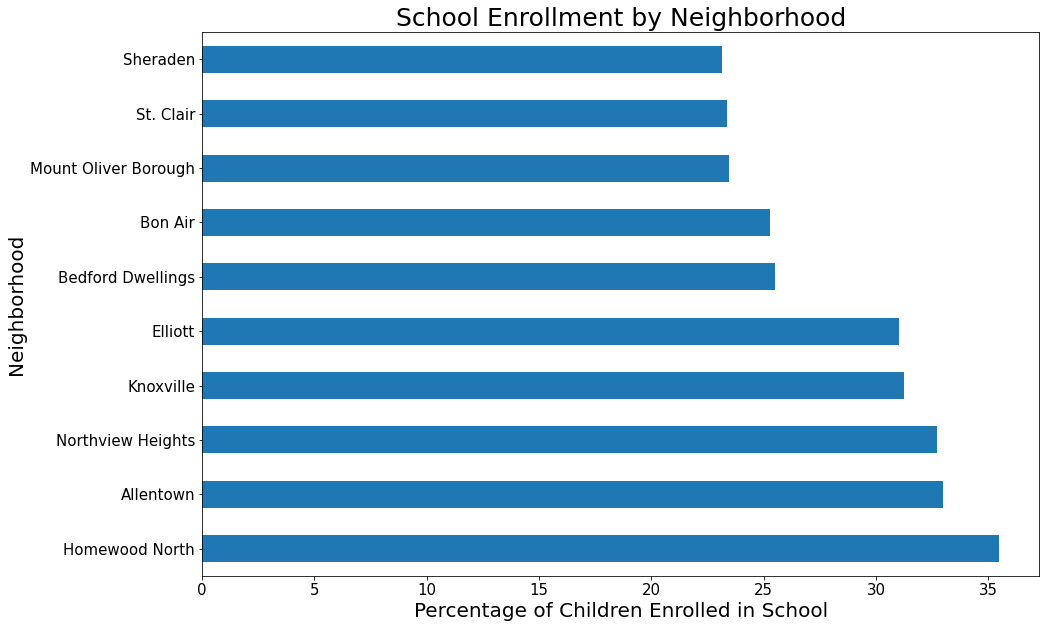

In [3]:
# Plotting the data on a bar graph
enrollment_graph = enrollment_data.head(10).plot.barh(x = "Neighborhood",figsize = (15,10), legend = None, fontsize = 15)
enrollment_graph.set_title("School Enrollment by Neighborhood", fontsize = 25)
enrollment_graph.set_xlabel("Percentage of Children Enrolled in School", fontsize = 20)
enrollment_graph.set_ylabel("Neighborhood", fontsize = 20)

#### Conclusion: School Enrollment
As the top ten neighborhoods in the sorted data shows, **Homewood North** comes in with an enrollment rate of nearly 35.5 percent. Using our metric, this makes it the best neighborhood to raise a family based on school enrollment. All the previous data was added to a dictionary to start developing our scoring system. 

In [4]:
scores = dict()

for item in neighborhoods["neighborhood"]:
        scores[item] = 0
        
for item in enrollment_data["Neighborhood"]:
    if item not in scores:
        continue
    else:
        scores[item] += enrollment_data[enrollment_data["Neighborhood"] == item].index[0]
scores

{'Beechview': 50,
 'Allegheny Center': 37,
 'Squirrel Hill South': 46,
 'Windgap': 16,
 'Perry South': 15,
 'Crafton Heights': 11,
 'Fineview': 17,
 'Terrace Village': 31,
 'Hazelwood': 12,
 'Lincoln Place': 49,
 'Sheraden': 9,
 'Brookline': 32,
 'Oakwood': 67,
 'New Homestead': 14,
 'South Side Slopes': 66,
 'Upper Hill': 41,
 'Brighton Heights': 36,
 'Allentown': 1,
 'East Liberty': 29,
 'Highland Park': 27,
 'Central Northside': 44,
 'Bloomfield': 74,
 'Mount Washington': 69,
 'Shadyside': 80,
 'Westwood': 52,
 'Hays': 53,
 'Polish Hill': 82,
 'Central Oakland': 84,
 'Lincoln-Lemington-Belmar': 21,
 'Esplen': 70,
 'Greenfield': 60,
 'Crawford-Roberts': 30,
 'Bedford Dwellings': 5,
 'Marshall-Shadeland': 63,
 'Beltzhoover': 56,
 'West Oakland': 59,
 'Elliott': 4,
 'Spring Garden': 64,
 'Homewood West': 43,
 'Strip District': 83,
 'Stanton Heights': 34,
 'East Carnegie': 61,
 'Upper Lawrenceville': 28,
 'South Oakland': 51,
 'Morningside': 62,
 'South Side Flats': 81,
 'Central Lawren

## Safety - Non-Traffic Citations:
The overall safeness and tranquility of a neighborhood is another important aspect to consider. We decided to gauge this by looking at the amount of non-traffic citations reported in each neighborhood in Pittsburgh. These kinds of citations are also known as "summary offenses" and are categorized as low-level criminal offenses. Examples include disorderly conduct, public drunkness, harassment, property damage, and trespassing. Not only is it dangerous, but these types of events can be disruptful to daily living, and as such, places with lower numbers would be concluded to be a better neighborhood to raise a family in terms of safety.

In [5]:
ntc = pd.read_csv("Non-Traffic-Citations.csv",
                  index_col="NEIGHBORHOOD") # read in dataset
ntc.head(5)

,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
NEIGHBORHOOD,,,,,,,,,,,,,,
North Oakland,1078081,16157849,M,B,29.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,4,507,8.0,3.0,-79.951692,40.449311
North Oakland,1078082,16157849,M,W,21.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,4,507,8.0,3.0,-79.951692,40.449311
Allegheny Center,1078083,16159579,NaN,NaN,NaN,2016-08-25T11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,1,2204,NaN,NaN,0.000000,0.000000
Homewood South,1078084,16159780,M,B,22.0,2016-08-25T16:42:00,"7200 Block FRANKSTOWN AV PITTSBURGH, PA","6501(a)(1) Scattering Rubbish; Any waste, dang...",5,1303,9.0,2.0,-79.896254,40.457329
Upper Lawrenceville,1078085,16161591,F,W,22.0,2016-08-28T00:58:00,"6100 Block BERLIN WY PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,2,1011,7.0,2.0,-79.946664,40.485403


This dataset included a lot of information on the details of each citation, but we wanted to focus on the level of crime by the amount per neighborhood, so the table was altered to group the data by neighborhoods and display the total number of offenses each of them recorded. This was then sorted from the least number of citations to the greatest.

In [6]:
ntc_nbhd = ntc.groupby("NEIGHBORHOOD")[["OFFENSES"]]
ntc_nbhd = ntc_nbhd.count() # counting total number of offenses for each neighborhood
ntc_nbhd = ntc_nbhd.sort_values(by=["OFFENSES"], ascending=True).drop('Unable To Retrieve Address') # sorting and dropping unhelpful data
ntc_nbhd.head(10)

,OFFENSES
NEIGHBORHOOD,
Mt. Oliver Boro,1
Ridgemont,1
Chartiers City,1
Outside State,2
St. Clair,3
Mt. Oliver Neighborhood,4
Swisshelm Park,4
New Homestead,5
Hays,5


The entirety of the dataset was then plotted as a bar graph. From it, we can see that many neighborhoods have few citations, while South Side Flats and Central Business District have reported the most.

<AxesSubplot:title={'center':'Number of Non-Traffic Citations in Pittsburgh Neighborhoods'}, xlabel='Number of Non-Traffic Citations', ylabel='Neighborhood'>

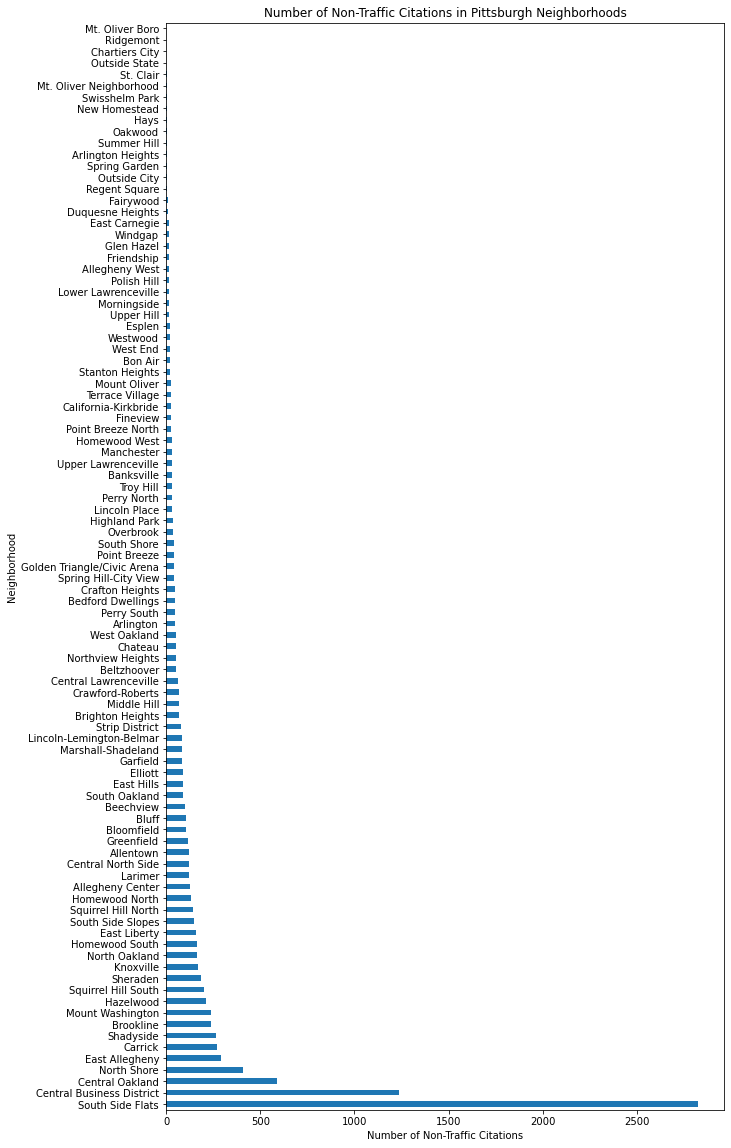

In [7]:
graph = ntc_nbhd.sort_values(by=["OFFENSES"], ascending=False)
graph = graph.plot.barh(y="OFFENSES",figsize=(10,20), legend=None) # plotting bar graph
graph.set_xlabel("Number of Non-Traffic Citations") # making labels for the graph
graph.set_ylabel("Neighborhood")
graph.set_title("Number of Non-Traffic Citations in Pittsburgh Neighborhoods")
graph # displays graph

Since there are so many neighborhoods, it is a little difficult to read. Thus, graphing only the top ten neighborhoods makes the process easier. We can tell the Mt. Oliver Boro, Ridgemont, and Chartiers City are some of the neighborhoods with the least amount of recorded offenses.

Text(0.5, 1.0, 'Number of Non-Traffic Citations in Pittsburgh Neighborhoods')

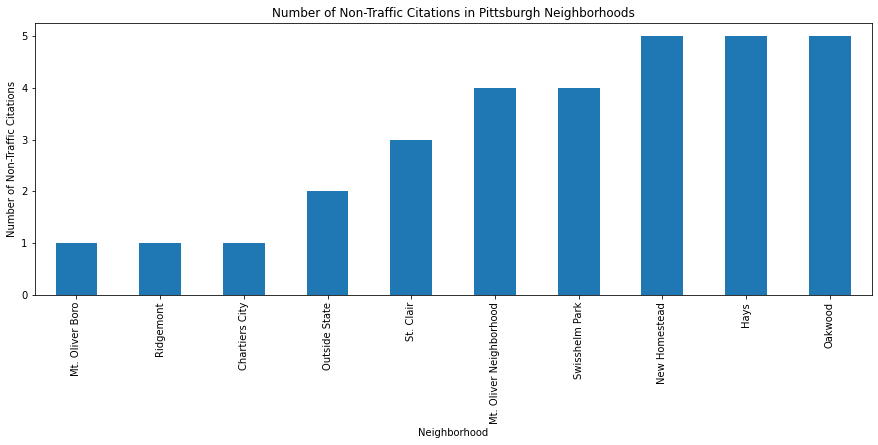

In [8]:
# graph of just the top 10 neighborhoods with least number of non-traffic citations
topten = ntc_nbhd[:10].plot(kind="bar", figsize=(15,5),legend=None)
topten.set_ylabel("Number of Non-Traffic Citations")
topten.set_xlabel("Neighborhood")
topten.set_title("Number of Non-Traffic Citations in Pittsburgh Neighborhoods")

We can visualize the data on a map as well. Seen below, areas with lower number of non-traffic citations are colored a light purple. As the amount increases, so does the intensity of the color. It also changes to the shade of blue. Hence, South Side Flats and Central Business District demonstrate significantly greater numbers since they are a much darker blue compared to the others. Also note that the light grey colors indicate neighborhoods with no data.

<AxesSubplot:>

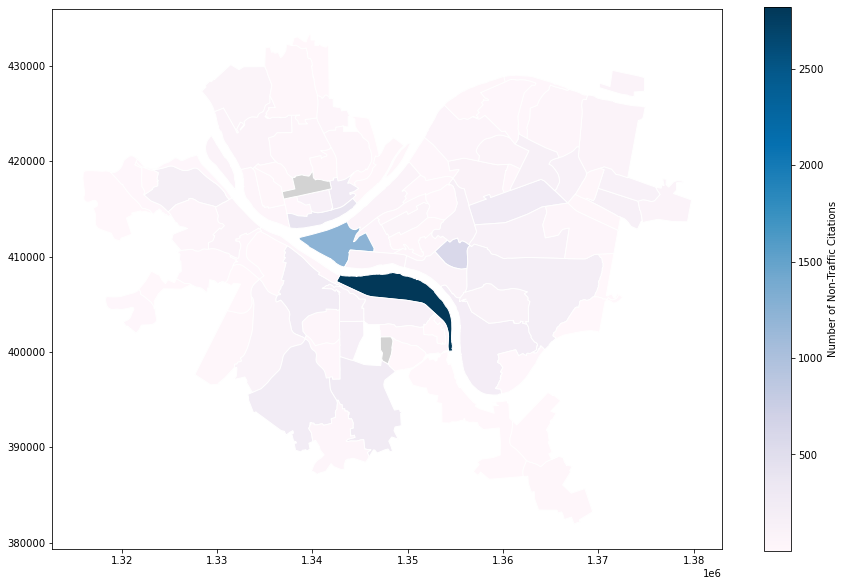

In [9]:
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp") # read in shapefile
ntc_map = neighborhoods.merge(ntc_nbhd, how='left', left_on='hood', right_on='NEIGHBORHOOD') # merge
ntc_map.plot(column='OFFENSES', # data to be used for coloring
               cmap='PuBu',              # color palette
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Number of Non-Traffic Citations"}, 
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"} # neighborhoods with no data are grey
               )

**Conclusion: Safety - Non-Traffic Citations**

From this dataset, we can conclude that Mt. Oliver Boro, Ridgemont, and Chartiers City are among the best neighborhoods to raise a family in. They reported the lowest number of low-level criminal offenses, indicating that not only are they safer areas to live in, where families do not have to worry as much about these kinds of incidents occurring, but also that life is more likely to be peaceful and quiet. The same cannot be said for neighborhoods like South Side Flats and Central Business District, however, as they reflected much higher numbers of non-traffic citations.

In [10]:
ntc_nbhd.reset_index(inplace = True, drop = False)

for item in ntc_nbhd["NEIGHBORHOOD"]:
    if item not in scores:
        continue
    else:
        scores[item] += ntc_nbhd[ntc_nbhd["NEIGHBORHOOD"] == item].index[0]

scores


{'Beechview': 118,
 'Allegheny Center': 112,
 'Squirrel Hill South': 130,
 'Windgap': 34,
 'Perry South': 66,
 'Crafton Heights': 60,
 'Fineview': 51,
 'Terrace Village': 63,
 'Hazelwood': 97,
 'Lincoln Place': 91,
 'Sheraden': 92,
 'Brookline': 119,
 'Oakwood': 76,
 'New Homestead': 21,
 'South Side Slopes': 144,
 'Upper Hill': 66,
 'Brighton Heights': 95,
 'Allentown': 73,
 'East Liberty': 108,
 'Highland Park': 70,
 'Central Northside': 44,
 'Bloomfield': 144,
 'Mount Washington': 155,
 'Shadyside': 168,
 'Westwood': 78,
 'Hays': 61,
 'Polish Hill': 104,
 'Central Oakland': 176,
 'Lincoln-Lemington-Belmar': 83,
 'Esplen': 97,
 'Greenfield': 131,
 'Crawford-Roberts': 88,
 'Bedford Dwellings': 55,
 'Marshall-Shadeland': 126,
 'Beltzhoover': 112,
 'West Oakland': 112,
 'Elliott': 69,
 'Spring Garden': 78,
 'Homewood West': 81,
 'Strip District': 144,
 'Stanton Heights': 64,
 'East Carnegie': 78,
 'Upper Lawrenceville': 64,
 'South Oakland': 118,
 'Morningside': 85,
 'South Side Flats':

## Playgrounds Equipments:

One other factor that we're taking into account when determining the "best" neighborhood in Pittsburgh is the number of playground equipments/facilities available in each neighborhood. According to our definition of "bestness", I thought that a neighborhood with the most number of playground equipments would be the best for raising a family. Playgrounds proide the perfect off-the-screen entertainment and offers various physical and social benefits for children as they go outdoors to play and have fun with eachtoher like playing tag or going on the swings. 

Instead of focusing on soley the number of playgrounds in each neighborhood, I thought that analyzing from the angle of the variety and amount of playground equipments would be more helpful. The more variety of playground equipments, the more things for children to enjoy and play with. This also means more opporunities for children to have fun without getting easily bored. 

In [11]:
#Load playground equipments data from the downloaded csv file from WPRDC

playground = pd.read_csv("playgroundEquipments.csv")
playground.head(10)

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817
5,788191865,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,f,1550.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456812,-80.075131
6,1387089430,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,3783.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457218,-80.075070
7,1838217886,Chartiers Playground,Play Area 2 to 5,Little Tykes,SofSurfaces,f,3789.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457329,-80.075145
8,1315630398,Chartiers Playground,Play Area 5 to 12,Little Tykes,SofSurfaces,f,1544.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456681,-80.075019
9,1603952265,Chartiers Playground,Whirl,NaN,SofSurfaces,f,1548.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456970,-80.075110


For this dataset, we're mainly concerned with the third column (equipment_type) and the ninth column (neighborhood). 
The elements in equipment_type represent the different kinds of playground equipments available in each neighborhood, including slides, whirls, swings, play areas, and others.

In [12]:
#counted up each of the neighbohood and how much equipment they had
playground.groupby("neighborhood").count()

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,
Allegheny Center,15,15,15,13,15,15,15,15,15,15,15,15,15,15,15,15,15
Allentown,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Banksville,6,6,6,6,6,6,0,0,6,6,6,6,6,6,6,6,6
Bedford Dwellings,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Beechview,21,21,21,21,14,21,16,21,21,21,21,21,21,21,21,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,5,5,5,4,4,5,2,5,5,5,5,5,5,5,5,5,5
West End,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
West Oakland,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


The code above displays a dataset that has counted up each of the 67 different neighborhoods (in alphabetical order) and the amount of playground equipments each neighborhood have (using the equipment_type column). 

In [13]:
#create a new dataframe called "counts" to count for the number of playground equipments within each  neighborhood.  
counts = playground["neighborhood"].value_counts().rename_axis('Neighborhood').reset_index(name='Number of Playground Equipments')
counts.head(67)

,Neighborhood,Number of Playground Equipments
0,Squirrel Hill South,32
1,East Liberty,26
2,Beechview,21
3,Allegheny Center,15
4,South Side Slopes,14
...,...,...
62,Esplen,2
63,East Carnegie,2
64,Westwood,2
65,West Oakland,1


In the table above, I removed all of the other columns, aside from "neighborhood" and "equipment_type", that were not necessary for my evaluation. I renamed the "equipment_type" column to "Number of Playground Equipment" to show the counted values of all the different equipments for each of the 67 neighborhood. 

Text(0, 0.5, 'Neighborhood')

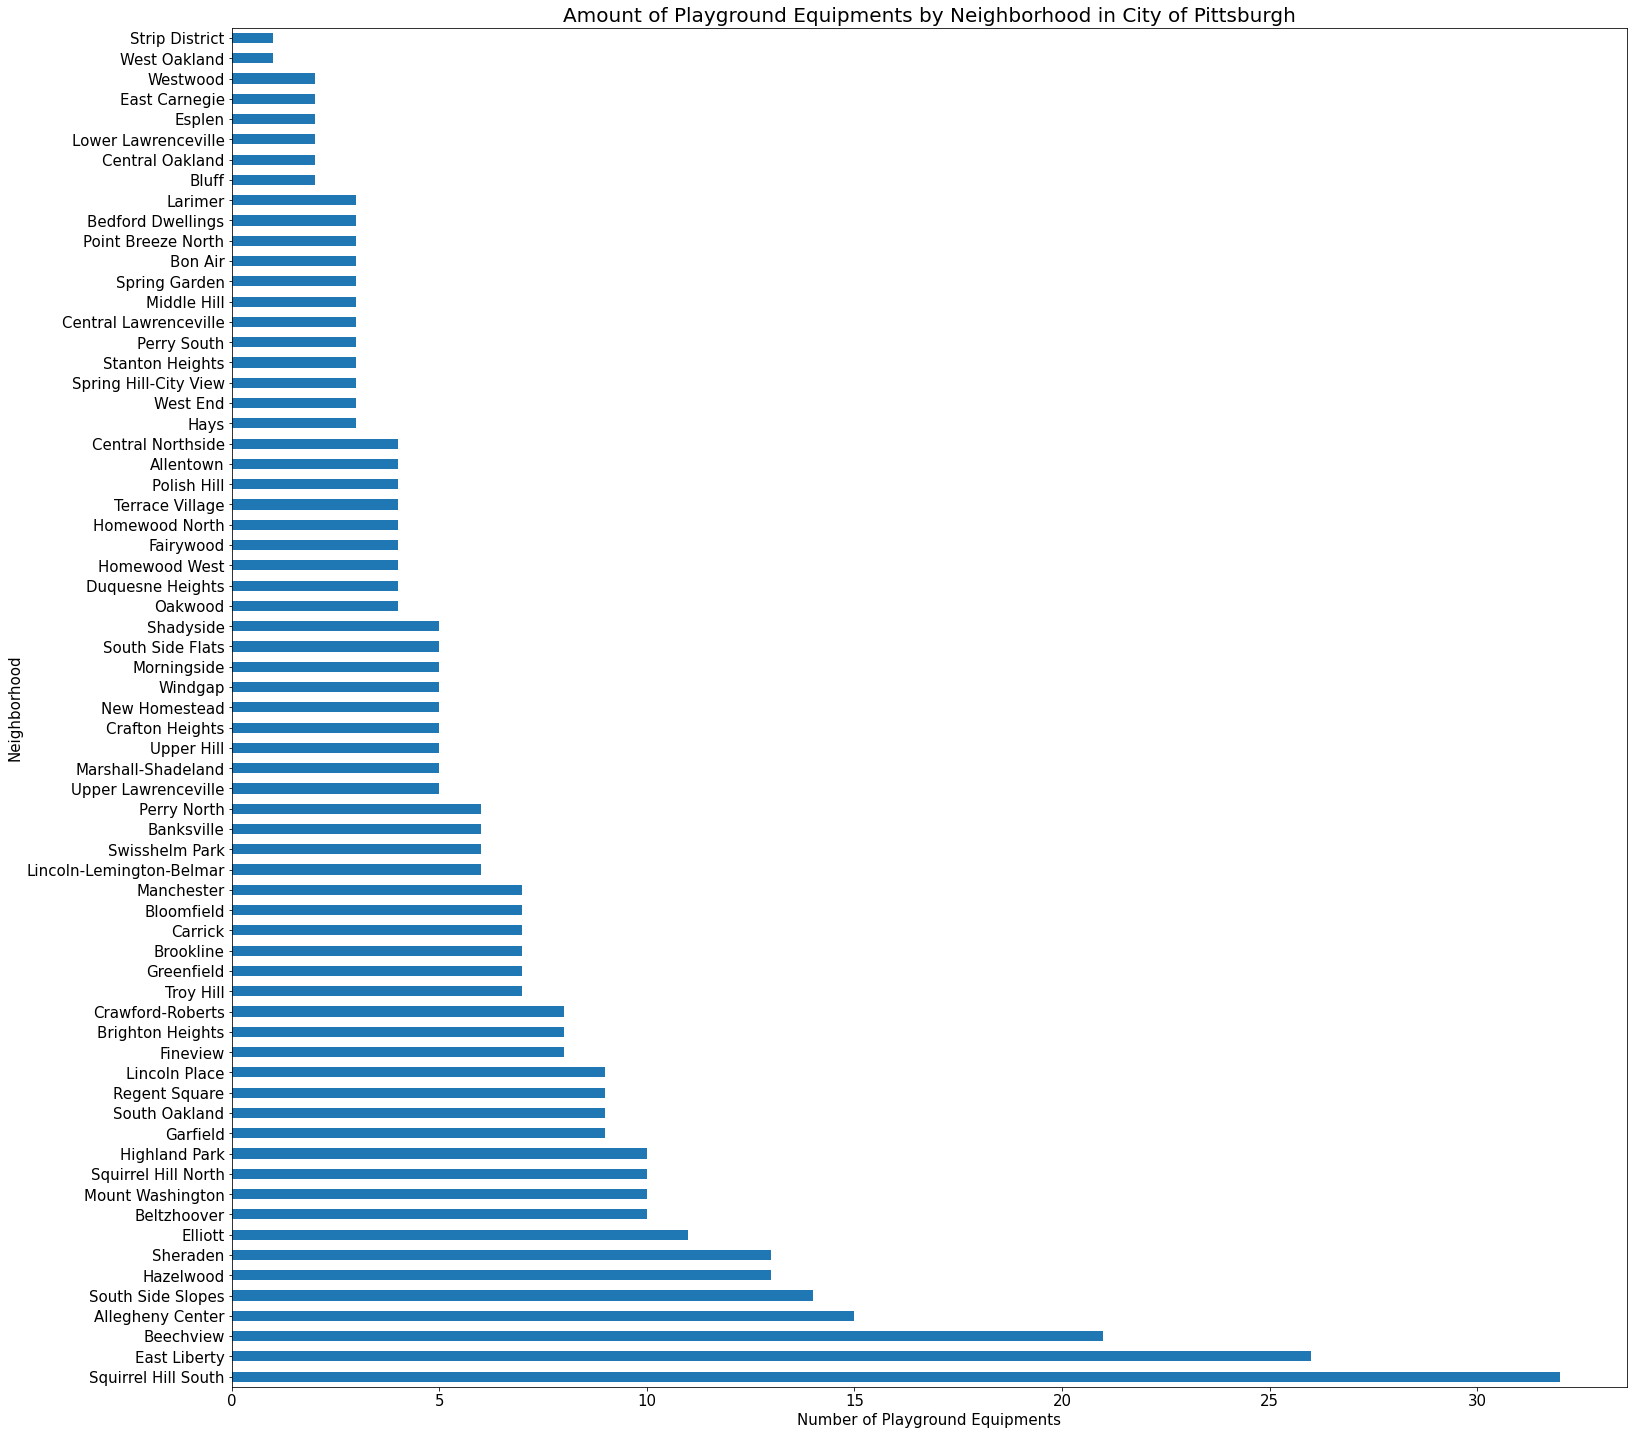

In [14]:
playground_graph = playground["neighborhood"].value_counts().plot.barh(x = "Neighborhood", width = 0.5, figsize=(25,25), legend = None, fontsize = 15)
playground_graph.set_title("Amount of Playground Equipments by Neighborhood in City of Pittsburgh", fontsize = 20)
playground_graph.set_xlabel("Number of Playground Equipments", fontsize = 15)
playground_graph.set_ylabel("Neighborhood", fontsize = 15)


**The Top 10**

In [15]:
#sort and label the top 10 neighborhoods with the most playground equipments. 
counts = playground["neighborhood"].value_counts().rename_axis('Neighborhood').reset_index(name='Number of Playground Equipments')
counts.head(10)

,Neighborhood,Number of Playground Equipments
0,Squirrel Hill South,32
1,East Liberty,26
2,Beechview,21
3,Allegheny Center,15
4,South Side Slopes,14
5,Hazelwood,13
6,Sheraden,13
7,Elliott,11
8,Beltzhoover,10
9,Mount Washington,10


In the above table, the top 10 neighborhoods (out of the 67 from the dataset) with the highest numbers of playground equipments are shown in descending order. 

Text(0, 0.5, 'Neighborhood')

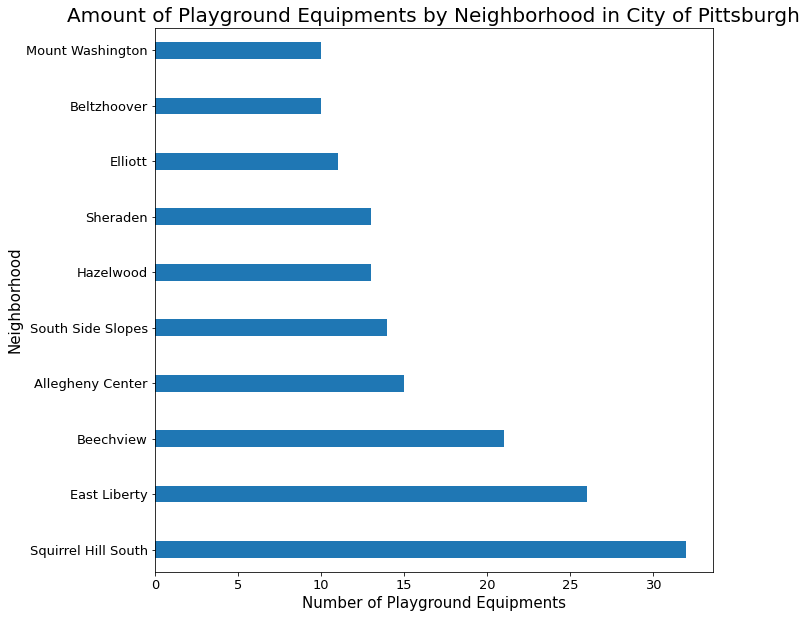

In [16]:
#plotting this data on a bar graph 
playground_graph = playground["neighborhood"].value_counts().head(10).plot.barh(x = "Neighborhood", width = 0.3, figsize=(10,10), legend = None, fontsize = 13)
playground_graph.set_title("Amount of Playground Equipments by Neighborhood in City of Pittsburgh", fontsize = 20)
playground_graph.set_xlabel("Number of Playground Equipments", fontsize = 15)
playground_graph.set_ylabel("Neighborhood", fontsize = 15)


The bar graph above is a visual representation for the chart shown. 
It shows the top 10 neighborhoods with the most playground equipments in increasing order from top to bottom. 

**Conclusion - Playground Equipments**

As you can see from both the chart and the bar graph, it is clear that **Squirrel Hill South** is the **"best"** Pittsburgh neighborhood for the **Playground Equipment metric** because it has the highest number of playground equipments (32) out of the 67 neighborhoods from the dataset, with East Libery and Beechview coming in 2nd and 3rd place respectively. Squirrel Hill South would be the "best" neighborhood for raising a family, because it has the most and a wide variety of playground equipments that any child can enjoy when playing outside. 


On the flipside, using this metric for our definition of "bestness", **West Oakland** the **Strip District** would be the **"worst"** neighborhoods for raising a family, because they each only have 1 piece of playground equipment. 

In [17]:
for item in counts["Neighborhood"]:
    if item not in scores:
        continue
    else:
        scores[item] += counts[counts["Neighborhood"] == item].index[0]
        
sorted_values = sorted(scores.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in scores.keys():
        if scores[k] == i:
            sorted_dict[k] = scores[k]
            break

print(sorted_dict)

{'Regent Square': 52, 'New Homestead': 54, 'Fineview': 67, 'Windgap': 68, 'Swisshelm Park': 74, 'Elliott': 76, 'Highland Park': 81, 'Central Northside': 90, 'Crafton Heights': 92, 'Upper Lawrenceville': 93, 'Garfield': 94, 'Upper Hill': 97, 'Sheraden': 98, 'Hazelwood': 102, 'Terrace Village': 106, 'Hays': 108, 'East Liberty': 109, 'Spring Hill-City View': 110, 'Squirrel Hill North': 111, 'Brighton Heights': 112, 'Oakwood': 114, 'Allegheny Center': 115, 'Troy Hill': 116, 'Perry South': 117, 'Allentown': 118, 'Beechview': 120, 'Homewood West': 121, 'Duquesne Heights': 123, 'Squirrel Hill South': 130, 'South Oakland': 131, 'Spring Garden': 132, 'Fairywood': 134, 'Carrick': 137, 'Banksville': 139, 'Brookline': 140, 'East Carnegie': 141, 'Westwood': 142, 'South Side Slopes': 148, 'Greenfield': 151, 'Marshall-Shadeland': 156, 'Esplen': 159, 'Mount Washington': 164, 'West End': 165, 'Bloomfield': 167, 'Point Breeze North': 168, 'Middle Hill': 171, 'West Oakland': 177, 'Central Lawrenceville':

## Conclusion
Since each dataset had a varying amount of neighborhoods, we selected the one with the least amount (playground equipments) and used that as our arbitrary list of neighborhoods. If a dataset included neighborhoods not in this list, they were not considered when calculating the lowest value (best) in our scoring system. However, the top ten neighborhoods in each dataset showed varying results, so the final "best" neighborhood was not as we expected since some of the neighborhoods were skipped. According to the final calculations, the top three neighborhoods were **Regent Square**, **New Homestead**, and **Fineview** respectively. By our definition of "bestness", **Regent Square** is the best neighborhood to raise a family in. 